In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import esm4ppe
import climpred as cp

In [65]:
es = esm4ppe.esm4ppeObj('tos','monthly').add_ensemble().add_control()
es.ensemble = es.ensemble.isel(member=slice(1,10))
es.ensemble

Opening static... static opened.
Ensemble present in zarr store... opening... ensemble opened.
Control present in zarr store... opening... control opened.


<xarray.Dataset>
Dimensions:  (init: 40, lead: 120, member: 9, xh: 720, yh: 576)
Coordinates:
  * init     (init) object 0123-01-01 00:00:00 ... 0381-10-01 00:00:00
  * lead     (lead) int64 1 2 3 4 5 6 7 8 9 ... 113 114 115 116 117 118 119 120
  * member   (member) int64 1 2 3 4 5 6 7 8 9
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Data variables:
    tos      (member, init, lead, yh, xh) float32 dask.array<chunksize=(9, 40, 1, 576, 145), meta=np.ndarray>

In [67]:
es = es.verify('acc',saveskill=True,groupby='month',dim=['member','init'],comparison='m2c',reference=['persistence'])

/nbhome/gam/miniconda3/envs/climpred_clean/lib/python3.10/site-packages/climpred/classes.py:1605: UserWarning: You may also calculate persistence based on ``initialized.isel(lead=0)`` by changing  ``set_options(PerfectModel_persistence_from_initialized_lead_0=True)``.
  warnings.warn(


DatasetError: You need to add at least one control dataset before attempting to compute a persistence forecast.

In [24]:
es = es.regionalmean(masksname="LME",omit=['ensemble','control'],saveregionalmean=True,verbose=True)

Calculating regional means for vs... Baltic Sea Sea of Okhotsk North Sea Gulf of Alaska Labrador - Newfoundland Celtic-Biscay Shelf Sea of Japan Oyashio Current Scotian Shelf California Current Black Sea Northeast U.S. Continental Shelf Mediterranean Sea Iberian Coastal Kuroshio Current Yellow Sea Canary Current East China Sea Southeast U.S. Continental Shelf Gulf of California Gulf of Mexico Arabian Sea Red Sea Insular Pacific-Hawaiian Caribbean Sea South China Sea Bay of Bengal Pacific Central-American Coastal Sulu-Celebes Sea Gulf of Thailand North Brazil Shelf Guinea Current Somali Coastal Current Indonesian Sea East Brazil Shelf Humboldt Current Benguela Current North Australian Shelf Northeast Australian Shelf Agulhas Current Northwest Australian Shelf East Central Australian Shelf South Brazil Shelf New Zealand Shelf Patagonian Shelf Southeast Australian Shelf Antarctica South West Australian Shelf West Central Australian Shelf Faroe Plateau Iceland Shelf and Sea Greenland Sea N

In [36]:
import matplotlib.pyplot as plt

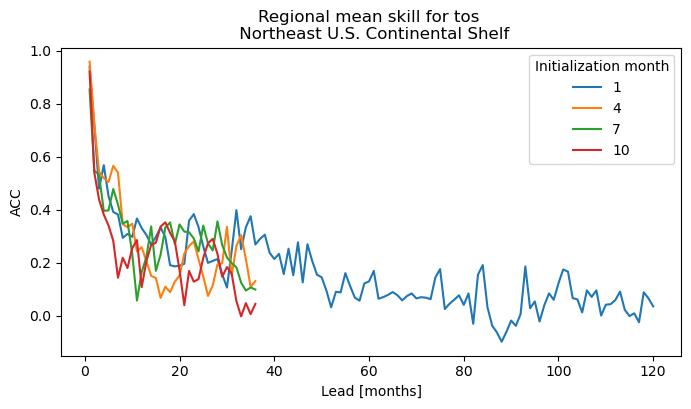

In [62]:
region = 'Northeast U.S. Continental Shelf'
variable = 'tos'
x = es.vs['lead']
y = es.vs.sel(region=region)[variable]
fig,ax = plt.subplots(figsize=(8,4))
for i in y['month']:
    im = ax.plot(x,y.sel(month=i).T,label=str(i.values))
ax.set_ylabel('ACC')
ax.set_xlabel('Lead [months]')
ax.set_title('Regional mean skill for '+variable+' \n '+region)
plt.legend(title='Initialization month')
fig.savefig('acc.neus.'+variable+'.bymonth.png')